## Springboard Data Science Track Capstone Project 2
### Music Genre Classification from Audio Samples
### by Morgan Fry
### Extended Modeling -- Time Distributed CNN

Since the LSTM model did not perform as well as the CNN model, it may be useful to combine something from the two approaches by wrapping the convolutional layers in a time distributed layer in order to capture the time related aspects of the data.

In [8]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

import utils

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)
else:
    print('no gpu')

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test, y_labels = utils.load_mfcc()

In [17]:
tf.keras.backend.clear_session()

model = models.Sequential()

model.add(layers.Reshape((968,24,1),input_shape=(X_train.shape[1],)))
model.add(layers.TimeDistributed(layers.Conv1D(32, 3, activation='relu')))
model.add(layers.TimeDistributed(layers.MaxPooling1D(2)))
model.add(layers.TimeDistributed(layers.Conv1D(32, 3, activation='relu')))

model.add(layers.TimeDistributed(layers.Conv1D(32, 3, activation='relu')))
model.add(layers.TimeDistributed(layers.MaxPooling1D(2)))
model.add(layers.TimeDistributed(layers.Flatten()))

model.add(layers.LSTM(units=32, dropout=0.2, return_sequences=False))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(8, activation='softmax'))

loss=tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.0, nesterov=True)
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 968, 24, 1)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 968, 22, 32)       128       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 968, 11, 32)       0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 968, 9, 32)        3104      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 968, 7, 32)        3104      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 968, 3, 32)        0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 968, 96)           0

In [18]:
%%time

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              min_delta=0.0001,
                                              patience=150,
                                              restore_best_weights=True)

with tf.device('/GPU:0'):
    history=model.fit(X_train,
              y_train,
              epochs=1000,
              batch_size=16,
              callbacks=[early_stop],
              validation_data=(X_val, y_val))

Epoch 1/1000
395/395 [==============================] - 16s 42ms/step - loss: 2.0784 - accuracy: 0.1420 - val_loss: 2.0744 - val_accuracy: 0.1627
Epoch 2/1000
395/395 [==============================] - 16s 41ms/step - loss: 2.0714 - accuracy: 0.1518 - val_loss: 2.0685 - val_accuracy: 0.1690
Epoch 3/1000
395/395 [==============================] - 17s 42ms/step - loss: 2.0683 - accuracy: 0.1620 - val_loss: 2.0618 - val_accuracy: 0.1904
Epoch 4/1000
395/395 [==============================] - 17s 42ms/step - loss: 2.0589 - accuracy: 0.1826 - val_loss: 2.0514 - val_accuracy: 0.2282
Epoch 5/1000
395/395 [==============================] - 17s 43ms/step - loss: 2.0509 - accuracy: 0.1842 - val_loss: 2.0410 - val_accuracy: 0.2371
Epoch 6/1000
395/395 [==============================] - 17s 43ms/step - loss: 2.0408 - accuracy: 0.1880 - val_loss: 2.0292 - val_accuracy: 0.2308
Epoch 7/1000
395/395 [==============================] - 17s 42ms/step - loss: 2.0320 - accuracy: 0.1995 - val_loss: 2.0183 -

Epoch 57/1000
395/395 [==============================] - 16s 40ms/step - loss: 2.0278 - accuracy: 0.1827 - val_loss: 2.0176 - val_accuracy: 0.2055
Epoch 58/1000
395/395 [==============================] - 16s 40ms/step - loss: 2.0259 - accuracy: 0.1797 - val_loss: 2.0231 - val_accuracy: 0.1955
Epoch 59/1000
395/395 [==============================] - 16s 40ms/step - loss: 2.0290 - accuracy: 0.1769 - val_loss: 2.0096 - val_accuracy: 0.1942
Epoch 60/1000
395/395 [==============================] - 16s 40ms/step - loss: 2.0183 - accuracy: 0.1892 - val_loss: 2.0014 - val_accuracy: 0.1955
Epoch 61/1000
395/395 [==============================] - 16s 40ms/step - loss: 2.0160 - accuracy: 0.1851 - val_loss: 1.9938 - val_accuracy: 0.2144
Epoch 62/1000
395/395 [==============================] - 16s 42ms/step - loss: 2.0113 - accuracy: 0.1910 - val_loss: 2.0013 - val_accuracy: 0.2030
Epoch 63/1000
395/395 [==============================] - 16s 40ms/step - loss: 2.0493 - accuracy: 0.1667 - val_loss: 2

395/395 [==============================] - 16s 41ms/step - loss: 1.7554 - accuracy: 0.3366 - val_loss: 1.6855 - val_accuracy: 0.3997
Epoch 168/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.7480 - accuracy: 0.3406 - val_loss: 1.6770 - val_accuracy: 0.3897
Epoch 169/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.7427 - accuracy: 0.3452 - val_loss: 1.6822 - val_accuracy: 0.3947
Epoch 170/1000
395/395 [==============================] - 17s 42ms/step - loss: 1.7439 - accuracy: 0.3369 - val_loss: 1.6711 - val_accuracy: 0.3997
Epoch 171/1000
395/395 [==============================] - 17s 42ms/step - loss: 1.7417 - accuracy: 0.3414 - val_loss: 1.6809 - val_accuracy: 0.4023
Epoch 172/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.7452 - accuracy: 0.3439 - val_loss: 1.6812 - val_accuracy: 0.3846
Epoch 173/1000
395/395 [==============================] - 18s 45ms/step - loss: 1.7404 - accuracy: 0.3418 - val_loss: 1.6696 - 

395/395 [==============================] - 18s 45ms/step - loss: 1.6417 - accuracy: 0.3937 - val_loss: 1.6605 - val_accuracy: 0.3834
Epoch 278/1000
395/395 [==============================] - 18s 45ms/step - loss: 1.6376 - accuracy: 0.3900 - val_loss: 1.6387 - val_accuracy: 0.3897
Epoch 279/1000
395/395 [==============================] - 18s 45ms/step - loss: 1.6335 - accuracy: 0.3951 - val_loss: 1.6613 - val_accuracy: 0.3783
Epoch 280/1000
395/395 [==============================] - 18s 45ms/step - loss: 1.6396 - accuracy: 0.3973 - val_loss: 1.6561 - val_accuracy: 0.3770
Epoch 281/1000
395/395 [==============================] - 18s 45ms/step - loss: 1.6331 - accuracy: 0.4011 - val_loss: 1.6415 - val_accuracy: 0.3657
Epoch 282/1000
395/395 [==============================] - 18s 46ms/step - loss: 1.6422 - accuracy: 0.3973 - val_loss: 1.6467 - val_accuracy: 0.3846
Epoch 283/1000
395/395 [==============================] - 18s 45ms/step - loss: 1.6329 - accuracy: 0.3998 - val_loss: 1.6450 - 

395/395 [==============================] - 16s 41ms/step - loss: 1.5597 - accuracy: 0.4368 - val_loss: 1.6083 - val_accuracy: 0.4124
Epoch 388/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.5601 - accuracy: 0.4312 - val_loss: 1.6118 - val_accuracy: 0.3947
Epoch 389/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.5509 - accuracy: 0.4365 - val_loss: 1.5689 - val_accuracy: 0.4414
Epoch 390/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.5556 - accuracy: 0.4361 - val_loss: 1.5724 - val_accuracy: 0.4414
Epoch 391/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.5479 - accuracy: 0.4425 - val_loss: 1.5965 - val_accuracy: 0.4187
Epoch 392/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.5599 - accuracy: 0.4322 - val_loss: 1.5823 - val_accuracy: 0.4275
Epoch 393/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.5499 - accuracy: 0.4352 - val_loss: 1.5625 - 

395/395 [==============================] - 19s 48ms/step - loss: 1.4676 - accuracy: 0.4740 - val_loss: 1.5494 - val_accuracy: 0.4678
Epoch 498/1000
395/395 [==============================] - 19s 48ms/step - loss: 1.4750 - accuracy: 0.4681 - val_loss: 1.5380 - val_accuracy: 0.4540
Epoch 499/1000
395/395 [==============================] - 18s 46ms/step - loss: 1.4728 - accuracy: 0.4764 - val_loss: 1.5630 - val_accuracy: 0.4678
Epoch 500/1000
395/395 [==============================] - 19s 49ms/step - loss: 1.4646 - accuracy: 0.4748 - val_loss: 1.5360 - val_accuracy: 0.4515
Epoch 501/1000
395/395 [==============================] - 19s 48ms/step - loss: 1.4768 - accuracy: 0.4691 - val_loss: 1.5274 - val_accuracy: 0.4666
Epoch 502/1000
395/395 [==============================] - 19s 48ms/step - loss: 1.4601 - accuracy: 0.4723 - val_loss: 1.5668 - val_accuracy: 0.4300
Epoch 503/1000
395/395 [==============================] - 19s 48ms/step - loss: 1.4611 - accuracy: 0.4784 - val_loss: 1.5295 - 

395/395 [==============================] - 16s 41ms/step - loss: 1.3819 - accuracy: 0.5113 - val_loss: 1.5448 - val_accuracy: 0.4540
Epoch 608/1000
395/395 [==============================] - 16s 41ms/step - loss: 1.3836 - accuracy: 0.5027 - val_loss: 1.5588 - val_accuracy: 0.4338
Epoch 609/1000
395/395 [==============================] - 17s 42ms/step - loss: 1.3882 - accuracy: 0.5054 - val_loss: 1.5392 - val_accuracy: 0.4565
Epoch 610/1000
395/395 [==============================] - 17s 42ms/step - loss: 1.3916 - accuracy: 0.5067 - val_loss: 1.5937 - val_accuracy: 0.4439
Epoch 611/1000
395/395 [==============================] - 18s 45ms/step - loss: 1.3865 - accuracy: 0.5103 - val_loss: 1.5819 - val_accuracy: 0.4464
Epoch 612/1000
395/395 [==============================] - 21s 54ms/step - loss: 1.3880 - accuracy: 0.5008 - val_loss: 1.5417 - val_accuracy: 0.4464
Epoch 613/1000
395/395 [==============================] - 20s 49ms/step - loss: 1.3759 - accuracy: 0.5076 - val_loss: 1.5424 - 

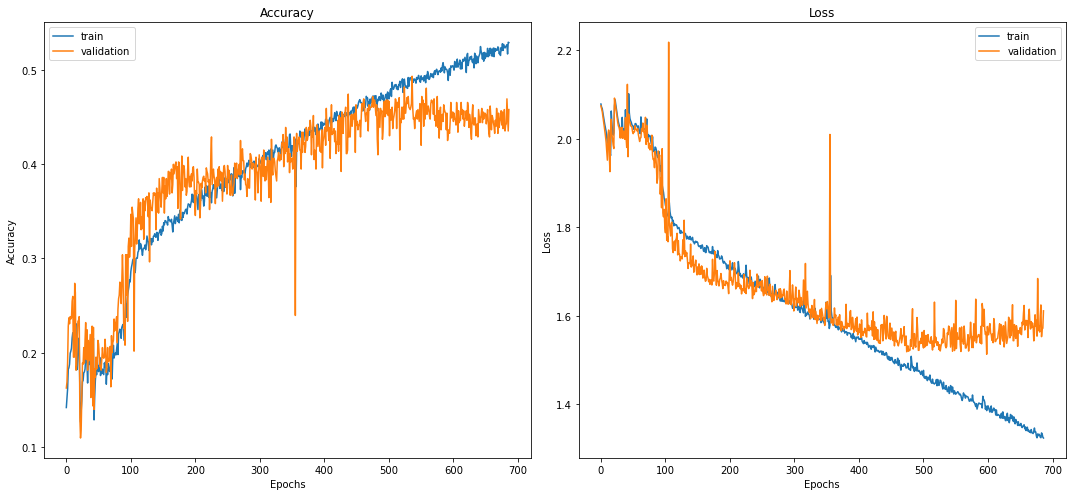

In [19]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

We can see that the validation and training set results diverge when the model achieves about 45% accuracy over the validation set, just as with the CNN model.

In [20]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
print('Classification Report (test set)')
print(classification_report(y_test,y_pred))

Classification Report (test set)
              precision    recall  f1-score   support

           0       0.42      0.51      0.46        96
           1       0.32      0.11      0.17        98
           2       0.34      0.48      0.40       100
           3       0.63      0.66      0.64       100
           4       0.38      0.47      0.42       100
           5       0.42      0.33      0.37       100
           6       0.34      0.31      0.32       100
           7       0.49      0.49      0.49       100

    accuracy                           0.42       794
   macro avg       0.42      0.42      0.41       794
weighted avg       0.42      0.42      0.41       794





The Time Dependent CNN model shows a modest improvement over both the CNN and LSTM models.

| Model | Accuracy(all classes) | Train Time |
| --- | --- | --- |
| Baseline | .30 | 5m |
| CNN | .39 | 3m |
| LSTM | .34 | 90m |
| TD-CNN | .42 | 3h 20m |


In [4]:
unique_labels=np.unique(y_labels)
unique_ytest=np.unique(y_test)

In [7]:
for i in range(8):
    print(unique_ytest[i],": ",unique_labels[i])

0 :  Electronic
1 :  Experimental
2 :  Folk
3 :  Hip-Hop
4 :  Instrumental
5 :  International
6 :  Pop
7 :  Rock


If we look at which genres of music the models are better and worse at classifying we can infer a few things about why the models' accuracy varies as it does.

| Class | Genre | F1 (CNN) | F1(LSTM) | F1(TD-CNN) |
| --- | --- | --- | --- | --- |
| 0 | Electronic | .45 | .35 | .46 |
| 1 | Experimental | .18 | .21 | .17 |
| 2 | Folk | .19 | .23 | .40 |
| 3 | Hip-Hop | .66 | .56 | .64 |
| 4 | Instrumental | .33 | .33 | .42 |
| 5 | International | .44 | .32 | .37 |
| 6 | Pop | .22 | .29 | .32 |
| 7 | Rock | .52 | .43 | .49 |

All of the models have an easier time with Hip-Hop and Rock than the other genres. I had expected Instrumental to be easier to classify, as it is defined by a lack of a vocalist, which is easy for a human to notice.

There are avenues for further improvement which are beyond the time constraints of this project. Using a more robust feature extraction, for instance using temograms and/or the raw audio as well as the MFCCs may give the models enough more features to train better.

Also, only an 8000 track subset of the FMA dataset was used. Using a larger dataset may help the model training.